# PCA on Olivetti Faces Dataset
## Overview
In this assignment, we explore Principal Component Analysis (PCA), a fundamental technique in machine learning for dimensionality reduction and feature extraction. We'll apply PCA to the Olivetti faces dataset to understand how it can be used to compress and reconstruct images.

## Objectives
1. Load and visualize the Olivetti faces dataset.
2. Perform PCA to reduce the dimensionality of the dataset.
3. Determine the optimal number of components using the elbow method.
4. Visualize the effect of PCA on image reconstruction.
5. Compare the performance of a model trained on the original dataset versus the PCA-reduced dataset.

## Prerequisites
Basic understanding of Python and NumPy.
Familiarity with matplotlib for plotting.
Basic knowledge of machine learning concepts, especially PCA.

## Step 1: Load and Visualize the Dataset


In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']

In [2]:
# Print the shape of the dataset
print(X.shape)

(400, 4096)


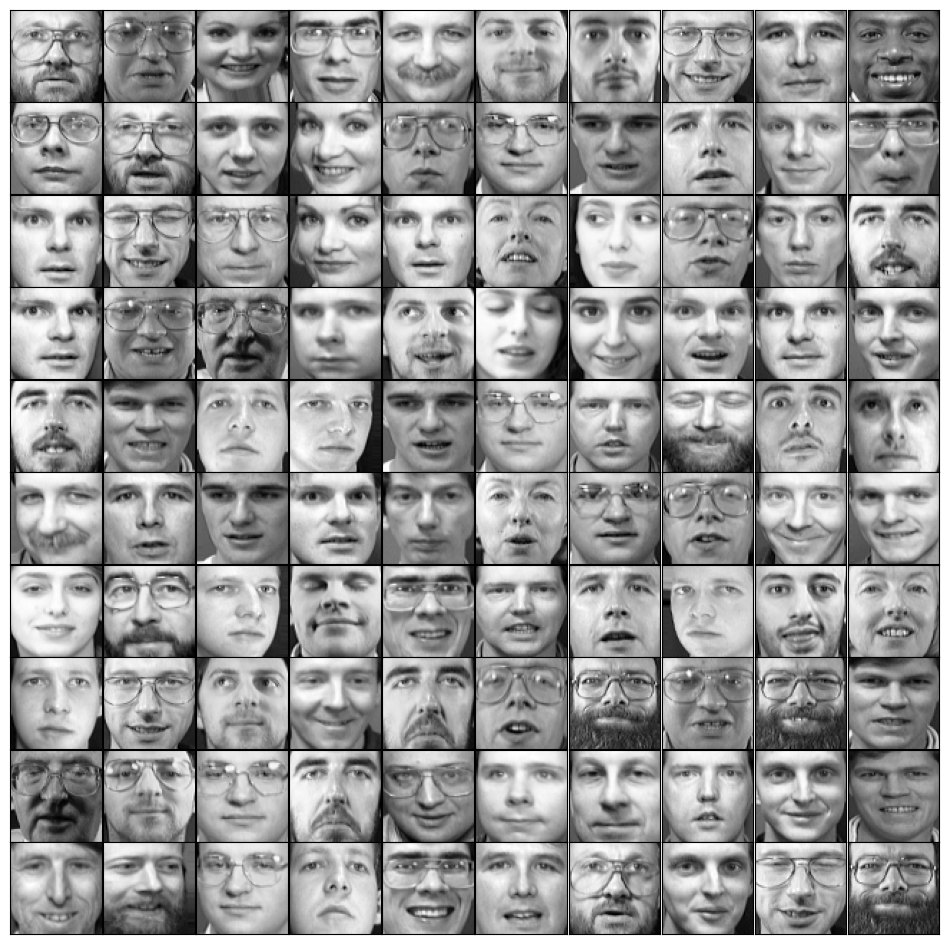

In [3]:
# Select 100 faces randomly for visualization
np.random.seed(0)  # Ensure reproducibility
X_samples = np.random.permutation(X)[:100]

# Plot the selected faces
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.01, wspace=0.01)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((64, 64)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## Step 2: Apply PCA on the Dataset
### Task
* Implement PCA on the dataset.
* Visualize the variance explained by each principal component.

In [4]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Apply PCA on the dataset (leave number of components blank)
pca_digits = PCA()
PC_dig1 = pca_digits.fit_transform(X)
# PC_dig1.shape

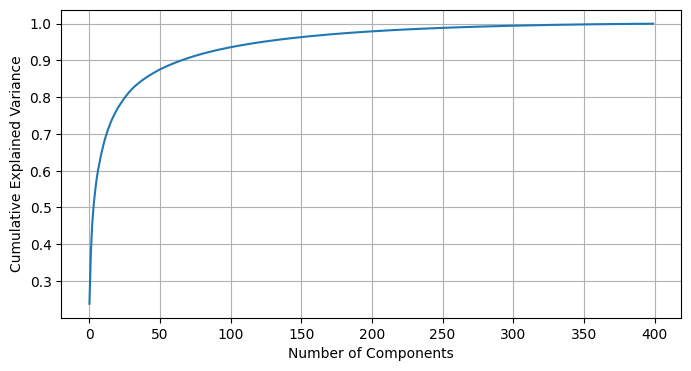

In [5]:
# Visualize the variance explained by each principal component
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Step 3: Elbow Method for Optimal Components
### Task
* Plot the cumulative explained variance against the number of components.
* Use the elbow method to determine a good number of components for PCA.

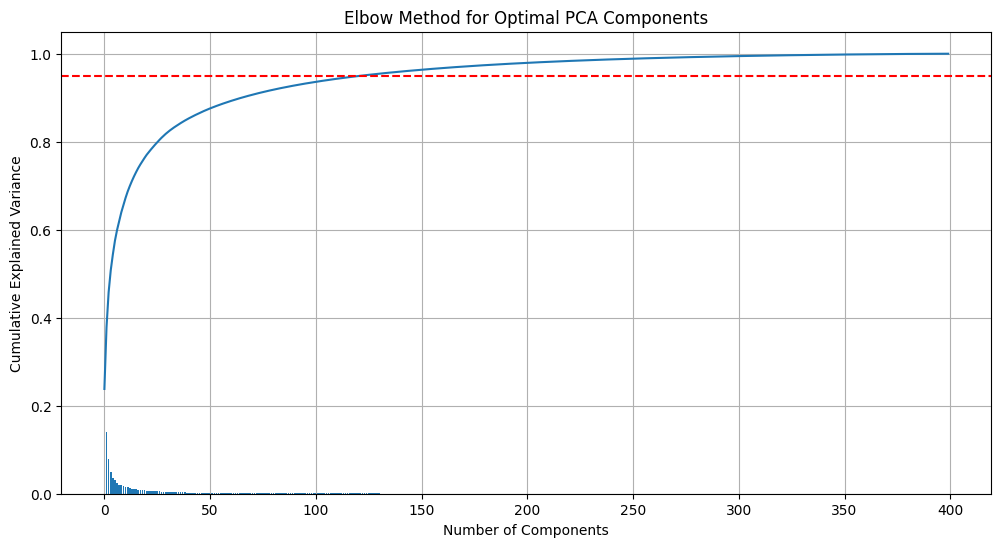

In [6]:
plt.figure(figsize=(12, 6))
n = pca_digits.explained_variance_ratio_.shape[0]
plt.bar(np.arange(n), pca_digits.explained_variance_ratio_)
# Plot the cumulative explained variance against the number of components
plt.plot(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--') # Example threshold line at 95% variance
plt.grid(True)
plt.show()


In [7]:
total_var = np.cumsum(pca_digits.explained_variance_ratio_) * 100

for i in [0, 20, 40, 60, 80, 100, 120, 140, 160]:
    print("pca_digits {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

pca_digits  1, explained var: 23.81
pca_digits 21, explained var: 77.03
pca_digits 41, explained var: 85.33
pca_digits 61, explained var: 89.29
pca_digits 81, explained var: 91.84
pca_digits 101, explained var: 93.61
pca_digits 121, explained var: 94.93
pca_digits 141, explained var: 95.94
pca_digits 161, explained var: 96.74


## Step 4: Image Reconstruction
### Task
* Reconstruct images using the selected number of PCA components.
* Plot original and reconstructed images side-by-side.

In [8]:
pca_n = PCA(100)
PC_dig2 = pca_n.fit_transform(X)
print(PC_dig2.shape)
X_reconstructed = pca_n.inverse_transform(PC_dig2)
X_reconstructed.shape


(400, 100)


(400, 4096)

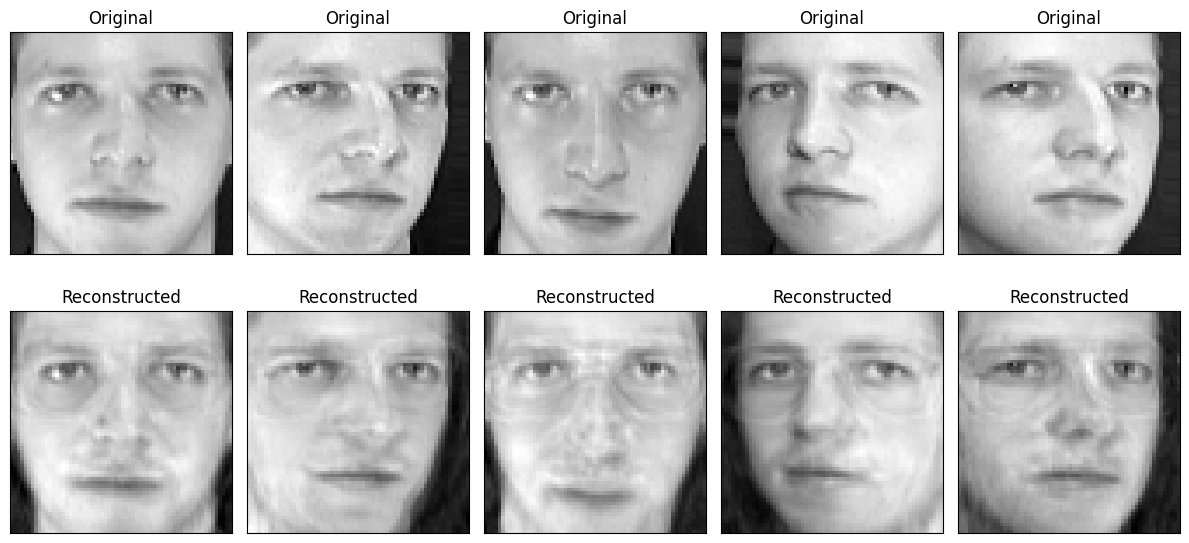

In [9]:
# Plot original and reconstructed images side-by-side
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    # Original Image
    ax = axes[0, i]
    ax.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Original")

    # Reconstructed Image
    ax = axes[1, i]
    ax.imshow(X_reconstructed[i].reshape(64, 64), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("Reconstructed")

plt.tight_layout()
plt.show()

## Step 5: Compare Models
### Task
* Train a model using the original dataset and the PCA-reduced dataset.
* Compare the performance of the two models.

In [10]:
from sklearn.model_selection import train_test_split
# your ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model on the original dataset
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train a model on the PCA-reduced dataset
X_train_pca, X_test_pca = pca_n.transform(X_train), pca_n.transform(X_test)
model_pca =  LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print the accuracy of both models
print(f"Accuracy with original data: {accuracy_original}")
print(f"Accuracy with PCA-reduced data: {accuracy_pca}")


Accuracy with original data: 0.9416666666666667
Accuracy with PCA-reduced data: 0.95


## Conclusion
In this assignment, you've learned how to apply PCA on image data, how to choose the number of components, and the effects of PCA on image reconstruction and model performance. This exercise helps in understanding the balance between data reduction and information retention, which is crucial in many machine learning applications.

